<center> <h2> Capstone Project </h2> </center>

# Handwritten Devnagri Character & Numeral Recognition using Deep Learning

<div style="float:right"><b>Nisha Gadhe<br/>4th May 2018</b></div><br/><br/><br/>

Devanagari is part of the Brahmic family of scripts of Nepal, India, Tibet, and South-East
Asia. The script is used to write Nepali, Hindi, Marathi and similar other languages of South
and East Asia. The Nepalese writing system adopted from Devanagari script consists of 12
vowels, 36 base forms of consonant, 10 numeral characters and some special characters.
Devnagari is used to write in India and Nepal.

Nowadays, techniques such as deep neural networks are sucessfully used to recognize handwritten devanagari characters
& digits. 

We propose here to apply some of these techniques to the devanagari characters/numeral.

## Exploring the Data
Let us load necessary Python libraries and read/load the Kaggle Downloaded csv data file through pandas.

In [1]:
# Standard useful data processing imports
import random
import numpy as np
import pandas as pd

# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("/home/nisha/dlnd/Hand-writing-recog/input/data.csv")

In [3]:
print(dataset.head(10))

   pixel_0000  pixel_0001  pixel_0002  pixel_0003  pixel_0004  pixel_0005  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   
6           0           0           0           0           0           0   
7           0           0           0           0           0           0   
8           0           0           0           0           0           0   
9           0           0           0           0           0           0   

   pixel_0006  pixel_0007  pixel_0008  pixel_0009       ...         \
0           0           0           0           0       ...          
1           

In [4]:
dataset.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


In [5]:
print("There seems to be no class imbalance in the dataset.")

There seems to be no class imbalance in the dataset.


## Visualize All the consonants characters & Numeral characters in Devnagari

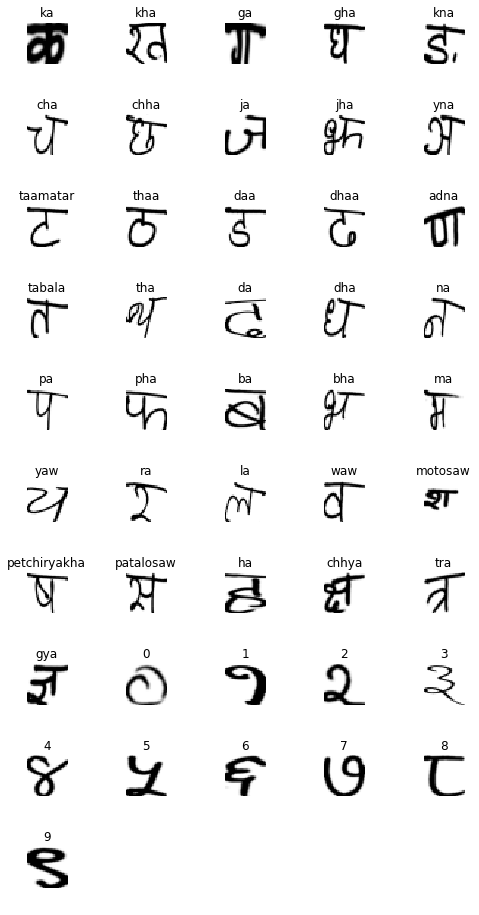

In [6]:
dataset.groupby("character").count()
char_names = dataset.character.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = dataset[dataset.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

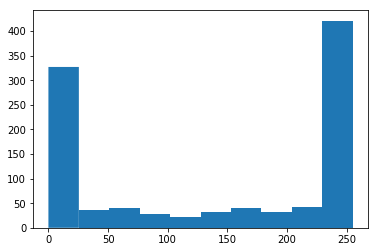

In [7]:
#Verifying the pixel distribution of any random character using matplotlib.

import matplotlib.pyplot as plt
plt.hist(dataset.iloc[0,:-1])
plt.show()

In [8]:
# Let us normalize all the pixel values and set the character column to target variable

X = dataset.values[:,:-1]/255.0
Y = dataset["character"].values

In [9]:
#Let us minimize the memory consumption

del dataset
n_classes = 46

## Preprocess the Data

In [10]:
# Let's split the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Encode the categories

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

img_height_rows = 32
img_width_cols = 32

im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) 
x_test = x_test.reshape(x_test.shape[0], *im_shape)
print("Preprocessing of Data is Done Successfully...")

Preprocessing of Data is Done Successfully...


## Implementing the Convolutional Neural Network (CNN) using Deep Learnig
### Build the Deep Neural Network (DNN) Model

Convolutional neural network is one kind of deep neural network. What’s characteristic about convolutional neural network is that it has convolution layer, which uses filters to convolve an area in input data to smaller area, detecting important or specific part within the area. The convolution can be used on image as well as text. For image, an area of pixels is convolved, while for text, a chain of characters or words are convolved. Anyway in both cases, convolution is aimed to extract the important part of the data. The convolutional neural network is specifically used for image classification, Hence we can use CNN to solve our problem.

In [11]:
pool_size = (2, 2)
kernel_size = (3, 3)

model = Sequential()

#Lets add convolutional, dense, activation  layer to form DNN model
model.add(Conv2D(32, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=im_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

print("Successfully built the DNN Model!")

/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1..., padding="valid")`
  if __name__ == '__main__':


Successfully built the DNN Model!


## Compile the Model

The model is compiled with 'categorical_crossentropy' as loss funtion, 'sgd' as optimizer and 'accuracy' as metrics.

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
             )
print("Model Compilation completed!")


Model Compilation completed!


## Visualize the Model

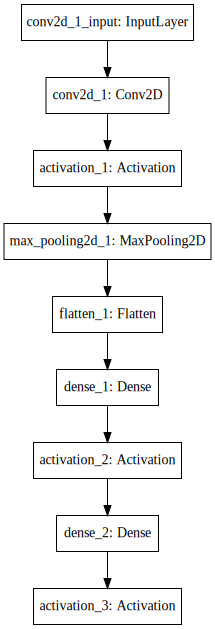

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Train the DNN Model

In [14]:
import time

nb_batch_size = 128
n_epoch=10

start = time.time()

history = model.fit(x_train, y_train,
                  batch_size=nb_batch_size, epochs=n_epoch,
                  validation_data=(x_test, y_test))

done = time.time()

elapsed = (done - start)/60

print("Model trained Successfully : Took - {} mins!".format(elapsed))

Train on 64400 samples, validate on 27600 samples
Epoch 1/10
64400/64400 [==============================] - 240s 4ms/step - loss: 2.9502 - acc: 0.3027 - val_loss: 1.7774 - val_acc: 0.5152
Epoch 2/10
64400/64400 [==============================] - 227s 4ms/step - loss: 1.3369 - acc: 0.6472 - val_loss: 1.7210 - val_acc: 0.5254
Epoch 3/10
64400/64400 [==============================] - 243s 4ms/step - loss: 1.1164 - acc: 0.7026 - val_loss: 1.2279 - val_acc: 0.6538
Epoch 4/10
64400/64400 [==============================] - 264s 4ms/step - loss: 1.0049 - acc: 0.7310 - val_loss: 1.1713 - val_acc: 0.6618
Epoch 5/10
64400/64400 [==============================] - 230s 4ms/step - loss: 0.9091 - acc: 0.7532 - val_loss: 1.1002 - val_acc: 0.6881
Epoch 6/10
64400/64400 [==============================] - 208s 3ms/step - loss: 0.8242 - acc: 0.7759 - val_loss: 1.1934 - val_acc: 0.6596
Epoch 7/10
64400/64400 [==============================] - 202s 3ms/step - loss: 0.7489 - acc: 0.7959 - val_loss: 0.8670 - 

## Evaluate the (Deep Neural Network)DNN Model

Now let's the test the DNN Model built above with Kaggle test dataset.

In [15]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss Value: %.2f%%" % (scores[0]*100))
print("Test Accuracy Value:  %.2f%%"  % (scores[1]*100))

Test Loss Value: 69.99%
Test Accuracy Value:  80.00%


## Build a Refined Model of Deep Neural Network

Let's refine the above model by making it much deeper by adding extra convolutional, dense, activation dropout layer and changing the optimizer to adam.

In [16]:
pool_size = (2, 2)
kernel_size = (3, 3)

rmodel = Sequential()

rmodel.add(Conv2D(32, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=im_shape))
rmodel.add(Activation('relu'))
rmodel.add(Conv2D(64, kernel_size[0], kernel_size[1]))
rmodel.add(Activation('relu'))
rmodel.add(MaxPooling2D(pool_size=pool_size))
rmodel.add(Dropout(0.25))

rmodel.add(Flatten())
rmodel.add(Dense(128))
rmodel.add(Activation('relu'))
rmodel.add(Dropout(0.5))
rmodel.add(Dense(n_classes))
rmodel.add(Activation('softmax'))

print("Successfully built the Refined DNN Model!")

Successfully built the Refined DNN Model!


/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1..., padding="valid")`
  
/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


## Compile the Refined Model
The refined model is compiled with 'categorical_crossentropy' as loss funtion, 'adam'(Adaptive Moment Estimation) as optimizer and 'accuracy' as metrics.


In [17]:
rmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print("Refined Model Compilation completed!")

Refined Model Compilation completed!


## Visualize the Refined Model

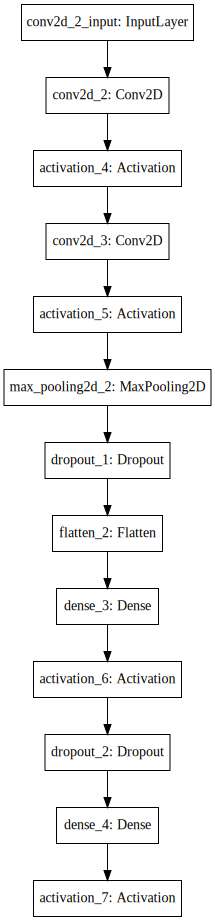

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(rmodel).create(prog='dot', format='svg'))

## Train the Refined DNN Model

In [19]:


batch_size = 128
n_epoch=10 

start = time.time()
rmodel.fit(x_train, y_train, batch_size=batch_size, nb_epoch=n_epoch,
          verbose=1, validation_data=(x_test, y_test))
done = time.time()

elapsed = (done - start)/60

print("Refined Model trained Successfully : Took - {} mins!".format(elapsed))



/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 64400 samples, validate on 27600 samples
Epoch 1/10
64400/64400 [==============================] - 1125s 17ms/step - loss: 1.2211 - acc: 0.6552 - val_loss: 0.3032 - val_acc: 0.9181
Epoch 2/10
64400/64400 [==============================] - 915s 14ms/step - loss: 0.5259 - acc: 0.8406 - val_loss: 0.2007 - val_acc: 0.9433
Epoch 3/10
64400/64400 [==============================] - 835s 13ms/step - loss: 0.3909 - acc: 0.8796 - val_loss: 0.1723 - val_acc: 0.9524
Epoch 4/10
64400/64400 [==============================] - 840s 13ms/step - loss: 0.3151 - acc: 0.9009 - val_loss: 0.1464 - val_acc: 0.9593
Epoch 5/10
64400/64400 [==============================] - 981s 15ms/step - loss: 0.2694 - acc: 0.9149 - val_loss: 0.1247 - val_acc: 0.9648
Epoch 6/10
64400/64400 [==============================] - 1074s 17ms/step - loss: 0.2343 - acc: 0.9249 - val_loss: 0.1125 - val_acc: 0.9687
Epoch 7/10
64400/64400 [==============================] - 935s 15ms/step - loss: 0.2091 - acc: 0.9337 - val_loss: 

## Evaluate the Refined DNN Model

In [20]:
scores = rmodel.evaluate(x_test, y_test, verbose=0)
print("Test Loss Value: %.2f%%" % (scores[0]*100))
print("Test Accuracy Value:  %.2f%%"  % (scores[1]*100))

Test Loss Value: 9.83%
Test Accuracy Value:  97.38%


## Accuracy & Loss Curves

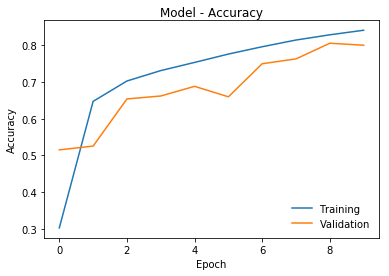

In [21]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [22]:
print("According to the accuracy curves, the training and validation curves clearly follow the same trend throughout. This is not a case of overfitting or underfitting.")

According to the accuracy curves, the training and validation curves clearly follow the same trend throughout. This is not a case of overfitting or underfitting.


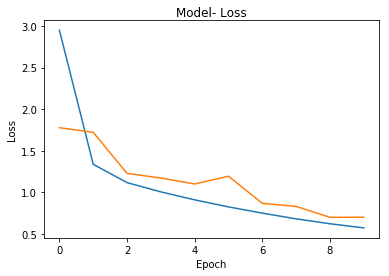

In [23]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Test the DNN with Real Data

Lets load images of an Devanagari <b>consonants characters & Numeral characters</b> and convert it to the required format and then predict what Devanagari characters is written in it.

### Load Images from Folder

Using opencv library, let's load images in a folder.

Note : These Consonants characters & Numeral characters were originally written on a A4 size white paper after which were photo and then cropped manually.

Download or scan or take photos  of handwritten Devanagari consonants & numerals	character

In [45]:
import os, os.path
import cv2

imgs = []
path = "/home/nisha/dlnd/Hand-writing-recog/devimg _refine"
count=0
for f in os.listdir(path):
    imgs.append(cv2.imread(os.path.join(path,f)))
    count+=1
print("Successfully loaded {} images".format(count))

Successfully loaded 14 images


### Preprocess the Loaded Image

Using numpy, opencv let's preprocess the image into the format required by the model to predict

In [46]:
X_pred = []

for img in imgs:
    # Convert the color image to rgb
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Invert black and white color(since in opencv white is considered 255 and black 0 but we need vice versa in order to match with the dataset)
    invert_gray = (255-gray)
    # Resize the image to 28,28 pixels as per the mnist dataset format
    resized = cv2.resize(invert_gray, (32, 32))

    # Convert the image format from (28,28) to (28,28,1) in order for the model to recognize
    resized = np.asarray(resized)
    resized.shape+=1,
    
    #scale the color channel from 0-255 to 0-1
    resized=resized/255
    
    X_pred.append(resized)
    
X_pred = np.asarray(X_pred)
print(X_pred.shape)

(14, 32, 32, 1)


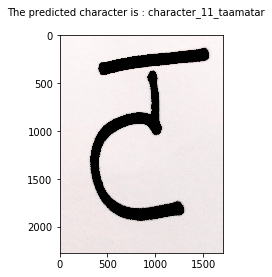

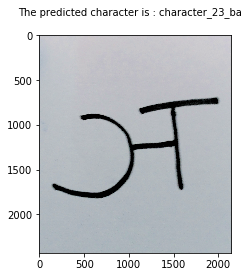

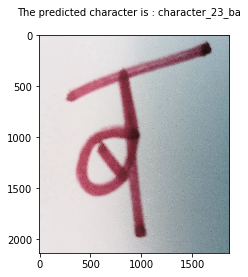

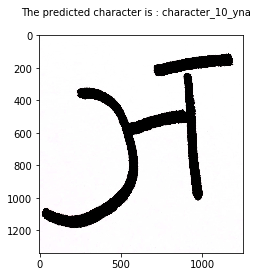

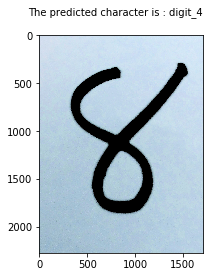

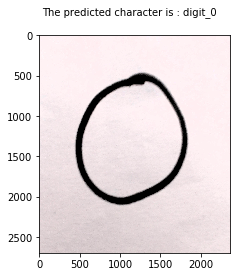

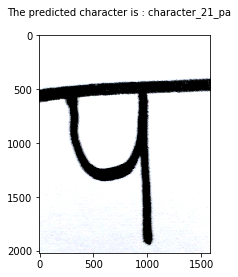

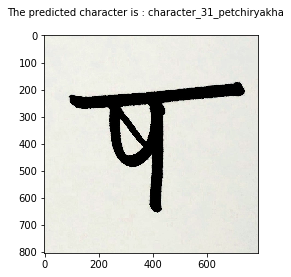

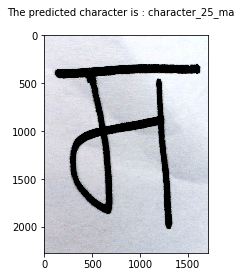

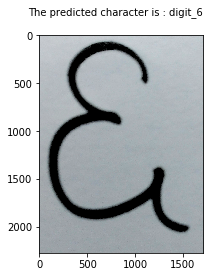

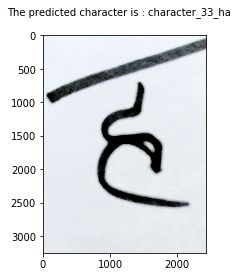

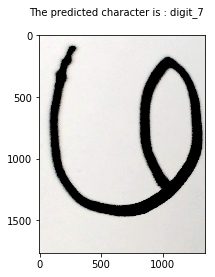

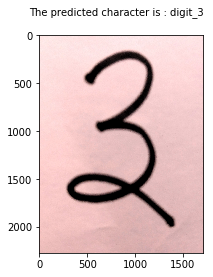

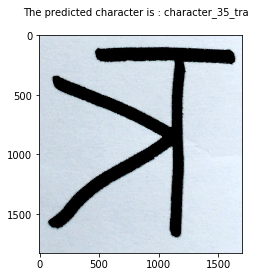

In [47]:
import matplotlib.cm as cm
# Predict the output
#from keras.utils.np_utils import probas_to_classes
#proba = rmodel.predict(X_pred)
# Convert the predicted output to respective integer number
answers = rmodel.predict_classes(X_pred)
         
plt.subplots_adjust(wspace=1, hspace=1)  
#plot the image and the predicted number
i=0
for img in imgs:
    plt.figure()
    plt.imshow(img, cmap=cm.binary)
    plt.suptitle("The predicted character is : " + str(char_names[answers[i]]))
    i+=1


## Results

From the above results we can see that 13/14(Except for image with consonant character 'yna') predictions are correct.Thus our model has performed well enough.



## Conclusion

Thus we have successfully implemented a Deep Neural Network(DNN) that can be trained over the Kaggle dataset and can be used in real time to predict the handwritten Devanagari Consonant & Numeral Character directly from any image file. The DNN Model built have an Accuracy score of 97.38%
